# Data Science Internship Project

First of all, import all packages that we will use later:

In [108]:
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

Read in csv file, and reduce the index column and make a new csv file with 'user', 'timestamp', 'xcoordinate' and 'ycoordinate' only. 

In [109]:
f=pd.read_csv('checkin_dataset.csv')
keep=['user','timestamp','xcoordinate','ycoordinate']
new_f=f[keep]
new_f.to_csv("newCheckInFile.csv", index=False)

Plot 'xcoordinate' and 'ycoordinate':

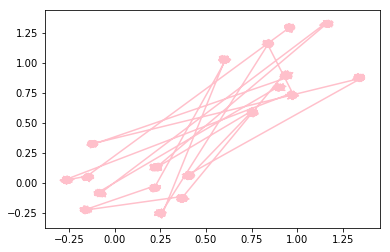

In [123]:
plt.plot(new_f['xcoordinate'],new_f['ycoordinate'],c='pink')
plt.show()

From the graph, we can see that all 25,000+ points are centered in 19 smaller clusters, and 2 main areas: top-right and bottom-left.
We want to see if that has anything to do with different users.

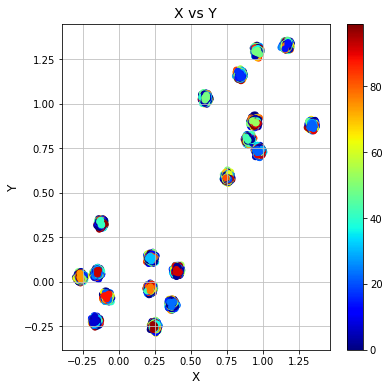

In [124]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("X vs Y",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
plt.scatter(new_f['xcoordinate'],new_f['ycoordinate'],
           c=new_f['user'],cmap='jet');
plt.colorbar()
plt.show()

So I plot X vs Y with different users represented in different colors.
From the graph, we can see same users tend to have x,y values in a certain range. 
As part of the conclusion, this means a user usually has a stable x value and y values. And we can see clearly there are two large clusters, one is on top-right, the other is on bottom-left, this means X and Y are highly correlated, also very few users stay in between, the users either have large X,Y values or small X, Y values.

I want to check the mean X value and Y value of all users and plot them.

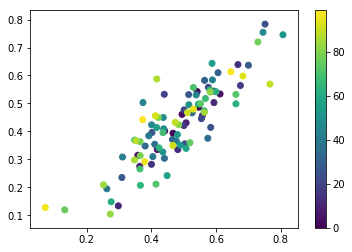

In [138]:
xmean=new_f.groupby('user',as_index=False)['xcoordinate'].mean()
ymean=new_f.groupby('user',as_index=False)['ycoordinate'].mean()
mean=pd.merge(xmean,ymean)
plt.scatter(mean['xcoordinate'],mean['ycoordinate'],c=mean['user'])
plt.colorbar()
plt.show()
#(If you want to check the mean table, just type: mean)

From this plot, we can conclude that:
First of all, x and y values are positively correlated. When a user has a high x score, he tends to have a high y score.  
Second, there are a couple of extrem values, and most of users' mean X and mean Y are in [0.2,0.7].
Last, users with little color on the graph (large user number) tend to have lower x and y score, for example our lowest two x and y values are both users with larger user id. And we can see top-right of our graph, our highest are points with darker colors which means lower user id.